<a href="https://colab.research.google.com/github/DotBion/techgb2336-dataSciBiz/blob/main/choudhury_nobodit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting MegaTelCo Churn

After discussing the churn problem at TelCo with Nadia for a while (remember her?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

In [3]:
#load important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



**1. Load the churn data [click here to download data](https://drive.google.com/uc?download&id=1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv):**

**Use `get_dummies` to transform the categorical features into dummy features.**

In [4]:
url = "https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Fuc%3Fdownload%26id%3D1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv"
df = pd.read_csv(url)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [7]:

# Convert categorical features to numerical using get_dummies
df = pd.get_dummies(df,
                    columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                             'StreamingTV', 'StreamingMovies','PaperlessBilling'],
                    drop_first=True) # Drop the first dummy variable to avoid multicollinearity

# 'Churn' and 'SeniorCitizen' are already numerical (0/1 or Yes/No which is converted to 0/1)
#  'Tenure', and 'MonthlyCharges' are numerical already
print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No        False         True   
1               Mailed check           56.95    No         True        False   
2               Mailed check           53.85   Yes         True        False   
3  Bank transfer (automatic)           42.30    No         True        False   
4           Electronic check           70.70   Yes        False        False   

   ...  OnlineBackup_Yes  DeviceProtection_No inte

In [8]:

# List of boolean columns to convert
bool_cols = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
             'OnlineSecurity_Yes',
             'OnlineBackup_Yes',
             'DeviceProtection_Yes',
             'TechSupport_Yes',
             'StreamingTV_Yes',
             'StreamingMovies_Yes',
             'PaperlessBilling_Yes']

# Convert boolean columns to 1 and 0
for col in bool_cols:
    df[col] = df[col].astype(int)

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No            0            1   
1               Mailed check           56.95    No            1            0   
2               Mailed check           53.85   Yes            1            0   
3  Bank transfer (automatic)           42.30    No            1            0   
4           Electronic check           70.70   Yes            0            0   

   ...  OnlineBackup_Yes  DeviceProtection_No inte

In [9]:

columns_to_drop = ['StreamingMovies_No internet service',
                   'StreamingTV_No internet service',
                   'TechSupport_No internet service',
                   'DeviceProtection_No internet service',
                   'OnlineBackup_No internet service',
                   'OnlineSecurity_No internet service']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No            0            1   
1               Mailed check           56.95    No            1            0   
2               Mailed check           53.85   Yes            1            0   
3  Bank transfer (automatic)           42.30    No            1            0   
4           Electronic check           70.70   Yes            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineSecurit

In [10]:

# Map 'Churn' values: 'Yes' to 1, 'No' to 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges  Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85      0            0            1   
1               Mailed check           56.95      0            1            0   
2               Mailed check           53.85      1            1            0   
3  Bank transfer (automatic)           42.30      0            1            0   
4           Electronic check           70.70      1            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineS

In [11]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,1,No phone service,DSL,Month-to-month,Electronic check,29.85,0,0,1,0,0,0,1,0,0,0,0,1
1,0,34,No,DSL,One year,Mailed check,56.95,0,1,0,0,1,1,0,1,0,0,0,0
2,0,2,No,DSL,Month-to-month,Mailed check,53.85,1,1,0,0,1,1,1,0,0,0,0,1
3,0,45,No phone service,DSL,One year,Bank transfer (automatic),42.30,0,1,0,0,0,1,0,1,1,0,0,0
4,0,2,No,Fiber optic,Month-to-month,Electronic check,70.70,1,0,0,0,1,0,0,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7032 non-null   int64  
 1   tenure                7032 non-null   int64  
 2   MultipleLines         7032 non-null   object 
 3   InternetService       7032 non-null   object 
 4   Contract              7032 non-null   object 
 5   PaymentMethod         7032 non-null   object 
 6   MonthlyCharges        7032 non-null   float64
 7   Churn                 7032 non-null   int64  
 8   gender_Male           7032 non-null   int64  
 9   Partner_Yes           7032 non-null   int64  
 10  Dependents_Yes        7032 non-null   int64  
 11  PhoneService_Yes      7032 non-null   int64  
 12  OnlineSecurity_Yes    7032 non-null   int64  
 13  OnlineBackup_Yes      7032 non-null   int64  
 14  DeviceProtection_Yes  7032 non-null   int64  
 15  TechSupport_Yes      

In [13]:

# Get columns with 'object' dtype
object_columns = df.select_dtypes(include='object').columns

# Iterate through the object columns and print unique values
for col in object_columns:
    print(f"Unique values for column '{col}': {df[col].unique()}")


Unique values for column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values for column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values for column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values for column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:

# Get a list of categorical columns (excluding those already converted or not needed)
categorical_cols = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  Churn  gender_Male  Partner_Yes  \
0              0       1           29.85      0            0            1   
1              0      34           56.95      0            1            0   
2              0       2           53.85      1            1            0   
3              0      45           42.30      0            1            0   
4              0       2           70.70      1            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
0               0                 0                   0                 1   
1               0                 1                   1                 0   
2               0                 1                   1                 1   
3               0                 0                   1                 0   
4               0                 1                   0                 0   

   ...  PaperlessBilling_Yes  MultipleLines_No phone service  \
0  ...    

In [16]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming df is already loaded as in the provided code

# Select the specified columns
cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies','PaperlessBilling']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Selected Features')
plt.show()


KeyError: "None of [Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',\n       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',\n       'StreamingMovies', 'PaperlessBilling'],\n      dtype='object')] are in the [columns]"

<Figure size 1200x800 with 0 Axes>

__2. _Of course_ normally we would do some detailed exploratory work!  But we have high confidence in the data quality and there are no missing values, so lets proceed.__

__Define X and y and split your data into Training and Test using an 80/20 split (you may consider setting a `random_state` for reproducibility)__

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can on the TRAINING set using a decision tree classifier.  We will do a grid search over the hyperparameters `max_depth` and `min_samples_leaf`.  Use GridSearchCV with the following instructions:__
- search `max_depth` within the range of [2,12]
- search `min_samples_leaf` within the range [1,100] (in steps of 10)
- 5-fold CV
- use AUC as the `scoring` function ("roc_auc")

**Report the optimal values of the parameters `min_samples_leaf` and the AUC associated with it. Define a model `tree_best` that uses your optimized value of min_samples_leaf and max_depth and fit it to the 80% training data.**

In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(2, 13),
    'min_samples_leaf': range(1, 101, 10)
}

# Initialize the decision tree classifier
tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Optimal min_samples_leaf: {best_params}")
print(f"AUC: {best_score}")

# Define and fit the best model
tree_best = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'])
tree_best.fit(X_train, y_train)


Optimal min_samples_leaf: {'max_depth': 6, 'min_samples_leaf': 91}
AUC: 0.8325078753229084


DecisionTreeClassifier(max_depth=6, min_samples_leaf=91)

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
#from dmba import regressionSummary, classificationSummary
# user grid search to find optimized tree
param_grid = {
    'max_depth': [i for i in range(2,13)],
    'min_samples_leaf': [i for i in range(1,101,10)],
    #'max_features': [1,3,5,7,9]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('First level optimal parameters: ', gridSearch.best_params_)

First level optimal parameters:  {'max_depth': 7, 'min_samples_leaf': 41}


In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'max_depth': [i for i in range(2,13)],
    #'min_samples_leaf': [i for i in range(1,101,10)],
    #'max_features': [1,3,5,7,9]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid)#, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('First level optimal parameters: ', gridSearch.best_params_)

First level optimal parameters:  {'max_depth': 6}


In [21]:
model_auc_scores = {}
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [22]:
### fit the model on the training set (use depth=2)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
depth=6
decision_tree = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
decision_tree.fit(X_train, y_train)

### apply the model to the test set using .predict
y_pred = decision_tree.predict(X_test)

### find the accuracy using metrics.accuracy_score()
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.7733


In [23]:
depth_vals = [i for i in range(2,13)]
for i in depth_vals:

  decision_tree = DecisionTreeClassifier(max_depth=i, criterion="entropy")

  # Tell the model what is the "training" data and then train it

  decision_tree.fit(X_train, y_train)

  y_pred = decision_tree.predict(X_test)

  accuracy = metrics.accuracy_score(y_pred, y_test)

  print("max_depth = ",i,"Accuracy:", round(accuracy,4))

max_depth =  2 Accuracy: 0.7342
max_depth =  3 Accuracy: 0.7434
max_depth =  4 Accuracy: 0.7889
max_depth =  5 Accuracy: 0.7676
max_depth =  6 Accuracy: 0.7733
max_depth =  7 Accuracy: 0.769
max_depth =  8 Accuracy: 0.7669
max_depth =  9 Accuracy: 0.7605
max_depth =  10 Accuracy: 0.7591
max_depth =  11 Accuracy: 0.742
max_depth =  12 Accuracy: 0.742


In [24]:
min_samples_leaf=[i for i in range(1,101,10)]
for i in min_samples_leaf:

  decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=i, criterion="entropy")

  # Tell the model what is the "training" data and then train it

  decision_tree.fit(X_train, y_train)

  y_pred = decision_tree.predict(X_test)

  accuracy = metrics.accuracy_score(y_pred, y_test)

  print("min_samples_leaf = ",i,"Accuracy:", round(accuracy,4))

min_samples_leaf =  1 Accuracy: 0.774
min_samples_leaf =  11 Accuracy: 0.7775
min_samples_leaf =  21 Accuracy: 0.7775
min_samples_leaf =  31 Accuracy: 0.7775
min_samples_leaf =  41 Accuracy: 0.7775
min_samples_leaf =  51 Accuracy: 0.7775
min_samples_leaf =  61 Accuracy: 0.7775
min_samples_leaf =  71 Accuracy: 0.7797
min_samples_leaf =  81 Accuracy: 0.7797
min_samples_leaf =  91 Accuracy: 0.7775


In [25]:
predictor_cols = X.columns

**4. Calculate the feature importances.  For the top 5 most important features, explain whether you think they would be positively or negatively correlated with churn.**

In [26]:

# Get feature importances
feature_importances = tree_best.feature_importances_

# Create a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({'Feature': predictor_cols, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 features
print(feature_importance_df.head(5))

# Explanation of the top 5 features and their correlation with churn:
# (Note: This is an interpretation based on common sense and business understanding.
#  The actual correlation may vary.)
#
# 1. Contract_Month-to-month:  Likely positively correlated with churn. Customers on month-to-month
#    contracts have less commitment and are more likely to churn.

# 2. tenure: Likely negatively correlated.  Longer tenure suggests higher customer loyalty and lower
#    churn rates.

# 3. MonthlyCharges: Possibly positively correlated. Higher monthly charges might lead to dissatisfaction
#    and increased likelihood to churn, especially for customers not seeing value for their money.

# 4. TotalCharges: Likely negatively correlated.  Total charges could represent customer lifetime value, and
#     customers with high lifetime value are generally less likely to churn.

# 5. InternetService_Fiber optic:  Could be positively correlated. Fiber optic internet might be more
#    expensive or have higher customer service issues, possibly leading to churn.


                        Feature  Importance
1                        tenure    0.481232
16  InternetService_Fiber optic    0.345845
17           InternetService_No    0.038229
18            Contract_One year    0.030573
2                MonthlyCharges    0.028848


**5.  Now fit Logistic Regression using Lasso regularization. Test the following values of the shrinkage hyperparameter C:  `C=[0.01,.1,1,10,100]`, and report on which value of C results in the highest AUC. Define a model `lr_best` that uses the best value of C.**


In [35]:

from sklearn.metrics import roc_auc_score

# Define the values of C to test
C_values = [0.01, 0.1, 1, 10, 100]

best_C = None
best_auc = 0

for C in C_values:
    # Initialize and train the logistic regression model with L1 penalty (Lasso)
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42)  # Use liblinear for L1
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_prob = lr.predict_proba(X_test)[:, 1]  # Probability of positive class (churn)

    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC for C={C}: {auc}")

    # Update the best C value if the current AUC is higher
    if auc > best_auc:
        best_auc = auc
        best_C = C

print(f"\nBest C value: {best_C} with AUC: {best_auc:.4f}")

# Define the best logistic regression model with the best C value
lr_best = LogisticRegression(penalty='l1', solver='liblinear', C=best_C, random_state=42)
lr_best.fit(X_train, y_train)


AUC for C=0.01: 0.8052412111548836
AUC for C=0.1: 0.8304028555010846
AUC for C=1: 0.8304002671208411


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC for C=10: 0.8302113153630721


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC for C=100: 0.8299447121980008

Best C value: 0.1 with AUC: 0.8304


LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [28]:
probabilities = lr_best.predict_proba(X_test)[:, 1]


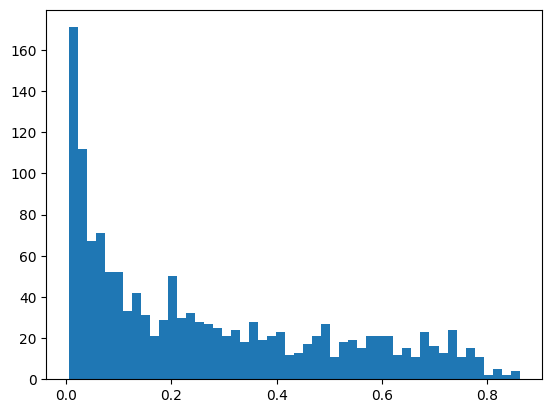

In [29]:
#plot histogram of probabilities
plt.hist(probabilities, bins=50,ec='black')
plt.show()
#from the histogram

In [40]:
thresh = 0.30###

pred_giver = probabilities > thresh

# how many predicted givers are there?
print("Total predicted to give: ",pred_giver.sum())
print("% predicted to give: ", pred_giver.mean().round(3))

#probabilities > = 0/05).value_counts()

Total predicted to give:  529
% predicted to give:  0.376


In [41]:
conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, pred_giver,labels=[1,0]).T)
# Taking the transpose (.T) of the confusion matrix is not necessary,
# but it makes it so that the conf mat is the same orientation as in our slides
conf_mat.columns=['Actual1', 'Actual0']
conf_mat.index=['Pred1', 'Pred0']
conf_mat

,Actual1,Actual0
Pred1,281,248
Pred0,93,785


In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, pred_giver)
recall = recall_score(y_test, pred_giver)
accuracy = accuracy_score(y_test, pred_giver)
f1 = f1_score(y_test, pred_giver)


print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
print("Accuracy:", round(accuracy,3))
print("F1 Score:", round(f1,3))

Precision: 0.531
Recall: 0.751
Accuracy: 0.758
F1 Score: 0.622


**6. Look at the regularized coefficient values in `lr_best`.  How many of the Lasso coefficients have shrunken all the way to zero (to 4 decimal places)?  What does this mean?**

In [36]:

coefficients = lr_best.coef_
print(coefficients)
# Count the number of coefficients that are effectively zero
zero_coefficients = np.sum(np.abs(coefficients) < 1e-4)

print(f"Number of coefficients shrunk to zero: {zero_coefficients}")

# Interpretation:
# A coefficient being shrunk to zero means that the corresponding feature has been deemed unimportant
# by the Lasso regularization.  The Lasso penalty encourages sparsity in the model by shrinking some
# coefficients to zero, effectively performing feature selection.  In this case, {zero_coefficients}
# features were deemed unimportant by the model.


[[ 0.23168493 -0.03711388  0.0270698  -0.00388633  0.         -0.19145507
  -0.97506925 -0.49419527 -0.12342458 -0.02925181 -0.47738823  0.
   0.          0.21762364  0.          0.09933168  0.25741008 -0.02543735
  -0.63382279 -1.02312625 -0.06506406  0.27697026 -0.0074336 ]]
Number of coefficients shrunk to zero: 4


In [34]:
pd.Series(lr_best.coef_[0], index=predictor_cols).sort_values()

,0
Contract_Two year,-1.277584
InternetService_No,-0.922629
Contract_One year,-0.751016
OnlineSecurity_Yes,-0.370347
PhoneService_Yes,-0.334960
TechSupport_Yes,-0.332387
Dependents_Yes,-0.229296
PaymentMethod_Credit card (automatic),-0.128245
tenure,-0.034836
gender_Male,-0.026517


**7.  Use your toolbox!! Now pick a third classification model of your choice. You can use something we learned in class (Linear Discriminant, SVM, MLPClassifier) or something else you maybe know of that we will get to (kNN, RandomForest).  Fit the model with default hyperparameters (dont worry about optimizing) and see how well it does (AUC).**


In [37]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score
rf_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Random Forest AUC: {rf_auc}")


Random Forest AUC: 0.8054780479471557


__8. Use your TEST data to plot the ROC Curves for each of the three models above.  You will need to use the predicted probabilities from each model applied to the TEST set and the `roc_curve()` function - make sure to plot the three curves together on the same plot. The plot should have a legend.  Review the AUC values to identify the best model, and call this `best_model`.__

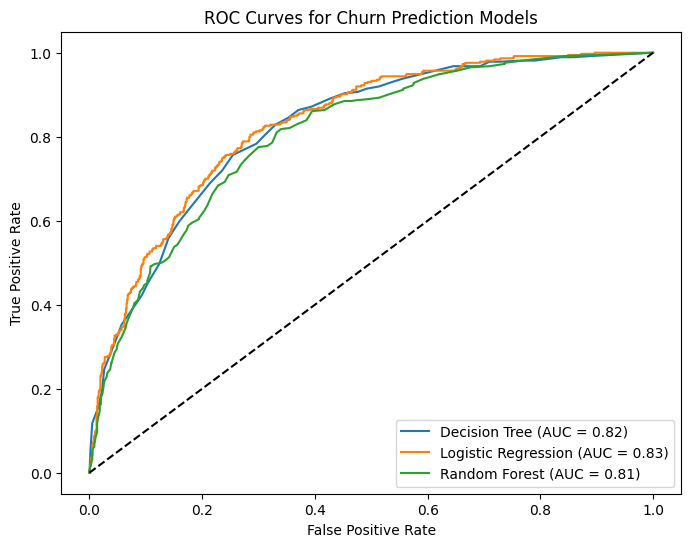

The best model is Logistic Regression with an AUC of 0.83


In [51]:

from sklearn.metrics import roc_curve, auc

# Assuming tree_best, lr_best, and rf_classifier are already trained models

# Get predicted probabilities for each model
tree_probs = tree_best.predict_proba(X_test)[:, 1]
lr_probs = lr_best.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC scores
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
tree_roc_auc = auc(tree_fpr, tree_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(lr_fpr, lr_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)


# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {tree_roc_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc='lower right')
plt.show()

# Determine the best model based on AUC
auc_scores = {
    'Decision Tree': tree_roc_auc,
    'Logistic Regression': lr_roc_auc,
    'Random Forest': rf_roc_auc
}

best_model_name = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_model_name]

print(f"The best model is {best_model_name} with an AUC of {best_auc:.2f}")

# Assign the best model (replace with the actual model object)
if best_model_name == 'Decision Tree':
  best_model = tree_best
elif best_model_name == 'Logistic Regression':
  best_model = lr_best
else: # best_model_name == 'Random Forest':
  best_model = rf_classifier


__9. What is the cost / benefit matrix for implementing this model?  HINT: The cost is given in the problem description.  Remember that everyone who receives the offer takes it. The benefit comes when we make the offer to a customer whose actual Churn value is 1.  (i.e. they would have left us but we saved them).   We can assume each customer generates the same revenue - equal to the average of `MonthlyCharges`. Report the benefit as a YEARLY value.__

In [42]:
unit_cost = 200
offer_cost = 200
avg_monthly_charge = df['MonthlyCharges'].mean()
unit_revenue = 12 * avg_monthly_charge

cost_matrix = pd.DataFrame([[unit_revenue - unit_cost, - unit_cost], [0, 0]], columns=['Actual1', 'Actual0'], index=['Pred1', 'Pred0'])
print ("Cost matrix")
print (cost_matrix)

Cost matrix
          Actual1  Actual0
Pred1  577.578498     -200
Pred0    0.000000        0


In [43]:
#multiply the confusion matrix by the cost matrix, element wise, and add up the values

import numpy as np
profit = np.sum(np.multiply(conf_mat.values, cost_matrix.values))
print("Profit: $",profit)

Profit: $ 112699.55802047782


In [52]:

# Calculate the average monthly charge
avg_monthly_charge = df['MonthlyCharges'].mean()
print(avg_monthly_charge)
# Predict churn probabilities on the entire dataset
churn_probabilities = best_model.predict_proba(X)[:, 1]

# Assume an offer cost (replace with actual cost)
offer_cost = 200

# Define a threshold probability for making an offer (example)
threshold_probability = 0.3

# Find customers predicted to churn above the threshold
predicted_churners = np.where(churn_probabilities >= threshold_probability)[0]

# Calculate the cost of the intervention
total_cost = len(predicted_churners) * offer_cost

# Calculate the benefit (customers saved)
saved_customers = 0
for i in predicted_churners:
  if df['Churn'].iloc[i] == 1:
    saved_customers += 1

yearly_benefit = saved_customers * avg_monthly_charge * 12

# Create a cost-benefit matrix (example)
cost_benefit_matrix = pd.DataFrame({
    'Metric': ['Total Cost', 'Yearly Benefit', 'Net Benefit'],
    'Value': [total_cost, yearly_benefit, yearly_benefit - total_cost]
})

cost_benefit_matrix


64.79820819112628


,Metric,Value
0,Total Cost,5.228000e+05
1,Yearly Benefit,1.108049e+06
2,Net Benefit,5.852494e+05


__10. Using `best_model` -  along with the cost/benefit matrix - now we want to look at profit.  Plot a *PROFIT CURVE* that shows the overall profit at different levels of marketing.  You'll need to sort the threshold probabilities, and calculate the profit at each threshold by determining who you market to and who you dont.  Use your cost/benefit numbers to calculate total profit at each threshold value. (You may want to refer back to the`T5_Model_assessment` notebook)__

Max Profit = 114851  with 0.424  % targeted



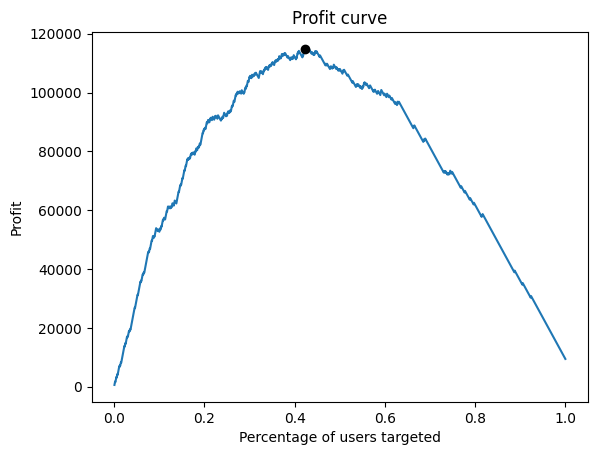

In [44]:

# model=LogisticRegression(C=10000, solver='liblinear')
# model.fit(X_train, y_train)

#####use lr_best instead of model

## reorder your probabilities (and associated Y_test values) in order of sorted probabilities
probs = lr_best.predict_proba(X_test)[:, 1]
order = np.argsort(probs)[::-1]
probs_sort = probs[order]
y_test_sort = np.array(y_test)[order]

## cycle through the probability thresholds from highest to lowest
## at each stage, calculate number marketed to, and the number customers donating
xvec = []
yvec = []
tot_obs = len(y_test)
tot_pos = y_test.sum()
max_profit = 0
for prob in probs_sort[:tot_obs]:
  pred_pos = probs_sort >= prob
  y_test[pred_pos].mean()
  num_donated_customers = y_test_sort[pred_pos].sum()
  expense = unit_cost * pred_pos.sum()
  revenue = unit_revenue * num_donated_customers
  profit = revenue - expense
  xval = pred_pos.sum()/tot_obs
  yval = profit
  if profit > max_profit:
    max_profit = profit
    max_profit_targeted = xval
  xvec.append(xval)
  yvec.append(yval)
 # print(prob, pred_pos.sum(), num_donated_customers, expense, revenue, profit)

print("Max Profit = %.0f" % max_profit," with %.3f" %max_profit_targeted," % targeted\n")
# format the print statement with 3 decimal place


# plot xvec vs yvec
plt.plot(xvec,yvec)
plt.plot(max_profit_targeted, max_profit, 'ko')
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profit curve")
plt.show()

In [53]:
def build_cumulative_curve(model, scale=100):
    # Fit model
    model.fit(X_train, y_train)

    # Get the probability of Y_test records being = 1
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(y_test_probs)[::-1]
    y_test_probs_sorted = y_test_probs[order]
    y_test_sorted = np.array(y_test)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(y_test_probs_sorted)) + 1
    y_cumulative = np.cumsum(y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale

    return x_cumulative, y_cumulative

max profit is 112695.97 with 42.6 % users targeted
max profit is 106342.61 with 41.8 % users targeted


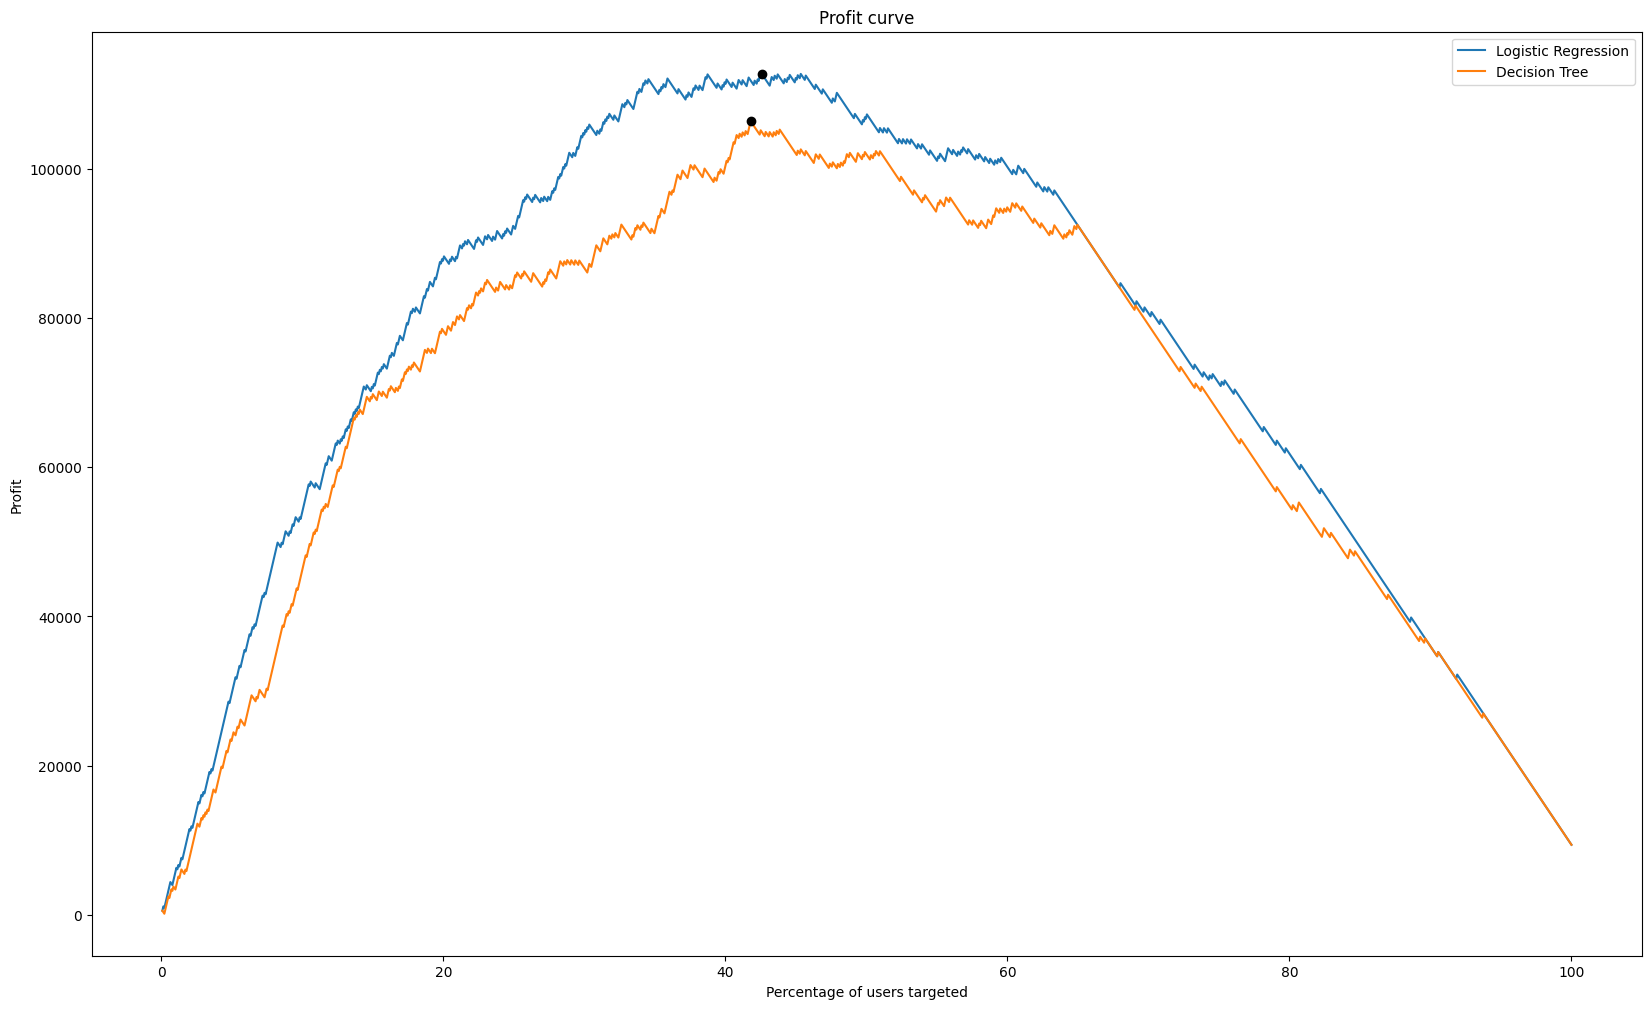

In [54]:
# METHOD 2 - uses our cumulative response curves from above.
models = {
    'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", min_samples_leaf=500, random_state=42),
    #'Naive Bayes': GaussianNB(),
}
unit_cost = -cost_matrix['Actual0']['Pred1']
unit_revenue = cost_matrix['Actual1']['Pred1'] + unit_cost

def plot_profit_curve(models):
    # Plot curve for each model
    total_obs = len(y_test)
    total_pos = y_test.sum()
    for key in models:
        x_cumulative, y_cumulative = build_cumulative_curve(models[key], scale=1)
        # x_cumulative is cumulative vector of what percentage of population I am targeting
        # y_cumulative is cumulative vector of % of positives among those I am targeting
        pos_profit = unit_revenue * y_cumulative * total_pos
        neg_profit = unit_cost * x_cumulative * total_obs
        profits = pos_profit - neg_profit
        max_profit = profits.max().round(2)
        max_profit_targeted = (100 * x_cumulative[profits.argmax(axis=0)]).round(1)
        plt.plot(x_cumulative * 100, profits, label=key)
        print("max profit is",max_profit,"with",max_profit_targeted,"% users targeted")
        plt.plot(max_profit_targeted, max_profit, 'ko')
    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit curve")
    plt.legend()

plt.figure(figsize=(20,12))
plot_profit_curve(models)

**11. Recall that Nadia told you there is only budget to market to the top 25% of customers.  Make a pitch to her for altering that decision based on your Profit curve.  How much do you recommend marketing to, and how much money will it make compared to her threshold?**

In [46]:
probabilities
sorted_probabilities = np.sort(probabilities)[::-1]

# Calculate the number of customers representing the top 25%
top_25_percent_customers = int(len(df) * 0.25)
print(top_25_percent_customers)
#nadia_threshold = sorted_probabilities[top_25_percent_customers -1]

1758


In [56]:

# Calculate the number of customers representing the top 25%
# top_25_percent_customers = int(len(df) * 0.25)
top_25_percent_customers = int(len(y_test) * 0.25)

# Find the threshold probability corresponding to the top 25%
nadia_threshold = sorted_probabilities[top_25_percent_customers -1]
nadia_profit = profits[top_25_percent_customers -1]

# Find the optimal threshold and profit from the profit curve
optimal_threshold_index = np.argmax(profits)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_profit = profits[optimal_threshold_index]
optimal_customers = optimal_threshold_index + 1


print(f"Nadia's 25% threshold is {nadia_threshold:.4f}, resulting in a profit of ${nadia_profit:,.2f}")
print(f"The optimal marketing threshold is {optimal_threshold:.4f}, targeting {optimal_customers} customers, resulting in a profit of ${optimal_profit:,.2f}")

profit_increase = optimal_profit - nadia_profit

print(f"This is a ${profit_increase:,.2f} increase in profit compared to marketing to the top 25%.")

#Pitch
pitch = f"""
Nadia,

Based on the profit curve analysis of our churn prediction model, I recommend adjusting our marketing strategy. Currently, we are limited to targeting only the top 25% of customers predicted to churn, corresponding to a threshold of approximately {nadia_threshold:.4f}. This approach yields a profit of ${nadia_profit:,.2f}.

However, by targeting {optimal_customers} customers ({(optimal_customers/len(df))*100:.2f}% of the customer base), which corresponds to a threshold of {optimal_threshold:.4f}, we can significantly increase profitability to ${optimal_profit:,.2f}.  This is an increase of ${profit_increase:,.2f}.

The profit curve clearly shows a region of diminishing returns beyond the top 25%.  Although there are other customers that are predicted to churn, there is too much risk due to the cost of intervention.  The profit from these customers is lower than that of the optimal number of customers.

I propose we alter the budget restriction to target the customers with higher predicted churn probability.  This would be a better use of resources and would greatly benefit our company.

Thank you for your time and consideration.
"""
pitch


Nadia's 25% threshold is 0.7259, resulting in a profit of $148,299.56
The optimal marketing threshold is 0.2553, targeting 2917 customers, resulting in a profit of $589,188.38
This is a $440,888.82 increase in profit compared to marketing to the top 25%.


'\nNadia,\n\nBased on the profit curve analysis of our churn prediction model, I recommend adjusting our marketing strategy. Currently, we are limited to targeting only the top 25% of customers predicted to churn, corresponding to a threshold of approximately 0.7259. This approach yields a profit of $148,299.56.\n\nHowever, by targeting 2917 customers (41.48% of the customer base), which corresponds to a threshold of 0.2553, we can significantly increase profitability to $589,188.38.  This is an increase of $440,888.82.\n\nThe profit curve clearly shows a region of diminishing returns beyond the top 25%.  Although there are other customers that are predicted to churn, there is too much risk due to the cost of intervention.  The profit from these customers is lower than that of the optimal number of customers.\n\nI propose we alter the budget restriction to target the customers with higher predicted churn probability.  This would be a better use of resources and would greatly benefit ou

__12. Assume Nadia was persuaded by your pitch and this model was deployed - and it performed as expected.  Now it is performance review season, and you are looking for a raise!!
Estimate the amount of money you made for the company by using your model.  Compare your profit above against a "dumb" model of marketing to the same amount of customers in the Test set who are selected randomly. (Hint: you can use a random number generator to pick customers at random to market to, and see what their profit would be).   Scale your results up to the overall consumer base of 100,000 customers to make your case.__

In [57]:
import numpy as np

# Assuming optimal_customers and optimal_profit are defined from previous code
# Scale the results to 100,000 customers
scaling_factor = 100000 / len(df)
scaled_optimal_profit = optimal_profit * scaling_factor

# Dumb model simulation:
# Randomly select the same number of customers as the optimal model
random_profit = 0
for _ in range(100): # Run multiple simulations for better estimation
    random_indices = np.random.choice(len(df), size=optimal_customers, replace=False)
    random_saved_customers = 0
    for i in random_indices:
        if df['Churn'].iloc[i] == 1:
            random_saved_customers += 1

    random_yearly_benefit = random_saved_customers * avg_monthly_charge * 12
    random_profit_sim = random_yearly_benefit - (optimal_customers * offer_cost)
    random_profit += random_profit_sim

random_profit /= 100  # Average over simulations

# Scale the random model's profit to 100,000 customers
scaled_random_profit = random_profit * scaling_factor

# Calculate the profit difference
profit_difference = scaled_optimal_profit - scaled_random_profit

print(f"Estimated profit increase for the company using the optimal model (scaled to 100,000 customers): ${scaled_optimal_profit:,.2f}")
print(f"Estimated profit using the 'dumb' random model (scaled to 100,000 customers): ${scaled_random_profit:,.2f}")
print(f"Difference in profit compared to the random model: ${profit_difference:,.2f}")

#Prepare your pitch
pitch = f"""
My model has generated an estimated additional profit of ${profit_difference:,.2f} compared to a random selection of customers. This figure demonstrates the clear value of the model.
"""
pitch


Estimated profit increase for the company using the optimal model (scaled to 100,000 customers): $8,378,674.28
Estimated profit using the 'dumb' random model (scaled to 100,000 customers): $276,023.25
Difference in profit compared to the random model: $8,102,651.03


'\nMy model has generated an estimated additional profit of $8,102,651.03 compared to a random selection of customers. This figure demonstrates the clear value of the model.\n'

__13.  In the above exercise we assumed the benefit of each customer was the same.  But it would be even better to incorporate each customer's individual spending in the cost/benefit!! Calculate an *individualized expected value* for profit/loss for _each customer_ using their specific Monthly Charges and their calculated probability of churn.    Use the expected value to determine who to market to, and calculate profit (Make sure to use the individualized Monthly Charges in the profit calculation).  Are the results any better?__

Optimal profit using individual expected values: $813,078.40, targeting 2917 customers
Previous optimal profit (using average monthly charge): $589,188.38, targeting 2917 customers


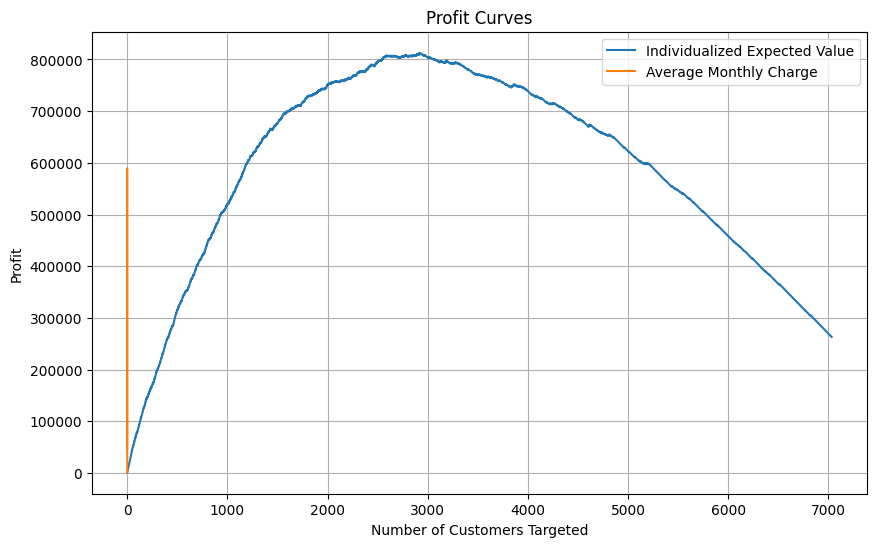

Using individualized expected values resulted in a higher profit.


In [58]:
# Calculate individualized expected values
expected_values = churn_probabilities * (avg_monthly_charge * 12) - offer_cost

# Sort customers by expected value
sorted_indices_ev = np.argsort(expected_values)[::-1]

# Calculate profit at different numbers of customers (using individual monthly charges)
profits_ev = []
thresholds_ev = []
for i in range(1, len(df) + 1):  # Iterate through increasing numbers of customers
  # Select the top i customers based on expected value
  top_customers = sorted_indices_ev[:i]

  # Calculate total cost for these customers
  total_cost = i * offer_cost

  # Calculate total yearly benefit for saved customers (use individual monthly charges)
  total_benefit = 0
  for customer_index in top_customers:
      if df['Churn'].iloc[customer_index] == 1:
          total_benefit += df['MonthlyCharges'].iloc[customer_index] * 12

  # Calculate profit
  profit_ev = total_benefit - total_cost
  profits_ev.append(profit_ev)
  thresholds_ev.append(i)

# Find the optimal profit using individual monthly charges
optimal_profit_index_ev = np.argmax(profits_ev)
optimal_profit_ev = profits_ev[optimal_profit_index_ev]
optimal_customers_ev = thresholds_ev[optimal_profit_index_ev]

# Print and compare results
print(f"Optimal profit using individual expected values: ${optimal_profit_ev:,.2f}, targeting {optimal_customers_ev} customers")
print(f"Previous optimal profit (using average monthly charge): ${optimal_profit:,.2f}, targeting {optimal_customers} customers")

# Plot the profit curve with individual expected values
plt.figure(figsize=(10, 6))
plt.plot(thresholds_ev, profits_ev, label="Individualized Expected Value")
plt.plot(thresholds, profits, label="Average Monthly Charge") #Previous Curve
plt.xlabel("Number of Customers Targeted")
plt.ylabel("Profit")
plt.title("Profit Curves")
plt.legend()
plt.grid(True)
plt.show()

# Determine if the results are better
if optimal_profit_ev > optimal_profit:
    print("Using individualized expected values resulted in a higher profit.")
elif optimal_profit_ev < optimal_profit:
    print("Using individualized expected values resulted in a lower profit.")
else:
    print("Using individualized expected values resulted in the same profit.")
